In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

In [2]:
%matplotlib inline

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Pré-processamento

### Carregamento dos dados

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 49s 0us/step


### Normalização das imagens

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

50000 imagens de treino, 32 pixels de largura, 32 pixels de altura, 3 canais (RGB)

In [8]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

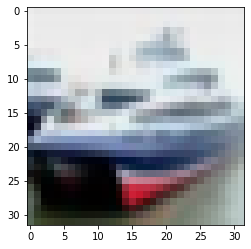

In [9]:
plt.imshow(X_test[1])

# Construção da Rede Neural (CNN)

In [10]:
model = tf.keras.models.Sequential()

### Primeira Camada de Convolução
* Filtros: 32
* Tamanho do kernel: 3
* Padding: same
* Func. Ativação: relu
* Camada de Entrada: 32, 32, 3

In [11]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32,32,3]))

### Segunda Camada de Convolução
* Filtros: 32
* Tamanho do kernel: 3
* Padding: same
* Func. Ativação: relu
    
### Camada de Max-Pooling
* pool_size: 2
* strides: 2
* padding: valid

In [12]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Terceira Camada de Convolução
* Filtros: 64
* Tamanho do kernel: 3
* Padding: same
* Func. Ativação: relu

In [13]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

### Quarta Camada de Convolução
* Filtros: 64
* Tamanho do kernel: 3
* Padding: same
* Func. Ativação: relu
    
### Camada de Max-Pooling
* pool_size: 2
* strides: 2
* padding: valid

In [14]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Camada de Flattening

In [15]:
model.add(tf.keras.layers.Flatten())

### Rede Neural Densa

In [16]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

### Compilação do Modelo

In [18]:
model.compile(optimizer="Adam", loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

### Treino do Modelo

In [19]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 1.9113 - sparse_categorical_accuracy: 0.2807
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2935 - sparse_categorical_accuracy: 0.5406
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0891 - sparse_categorical_accuracy: 0.6252
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9585 - sparse_categorical_accuracy: 0.6773
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8796 - sparse_categorical_accuracy: 0.7018
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8018 - sparse_categorical_accuracy: 0.7305
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7441 - sparse_categorical_accuracy: 0.7516
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6894 - sparse_categorical_accuracy: 0.7733
Epoch 9/20
1563/1563 [==========

### Avaliação do Modelo

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9972 - sparse_categorical_accuracy: 0.7178


In [21]:
print("Loss: {:.3f}, Accuracy: {:.3f}".format(test_loss, test_accuracy))

Loss: 0.997, Accuracy: 0.718
